# DSC540 Project 2

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Jacob Ledesma

**Honor Pledge:**  
I pledge on my honor that I, **Jacob Ledesma**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [ ]:
# Your package imports here

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
loans = pd.read_csv('loans.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


2981 Rows, 14 variables (columns)

In [9]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [10]:
loans['not.fully.paid'].unique()

array([0, 1])

Unique values of not.fully.paid are 0, 1

In [11]:
loans['not.fully.paid'].value_counts(normalize=True)

0    0.519289
1    0.480711
Name: not.fully.paid, dtype: float64

Proportion of people who took the loan and did not fully pay it back is 0.48 or 48%

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

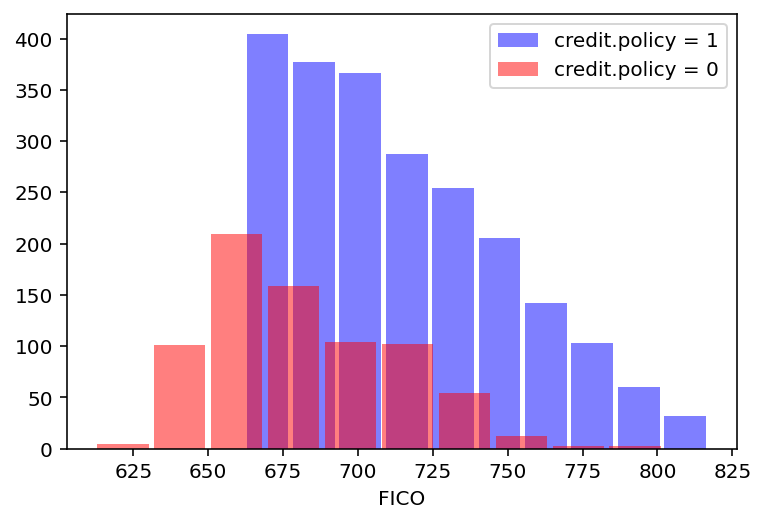

In [12]:
cred1 = loans['credit.policy']==1
cred0 = loans['credit.policy']==0
plt.hist(loans['fico'][cred1],color='blue',rwidth=0.9,alpha=0.5,label='credit.policy = 1')
plt.hist(loans['fico'][cred0],color='red',rwidth=0.9,alpha=0.5,label='credit.policy = 0')
plt.legend(loc='upper right')
plt.xlabel('FICO') 
plt.show()

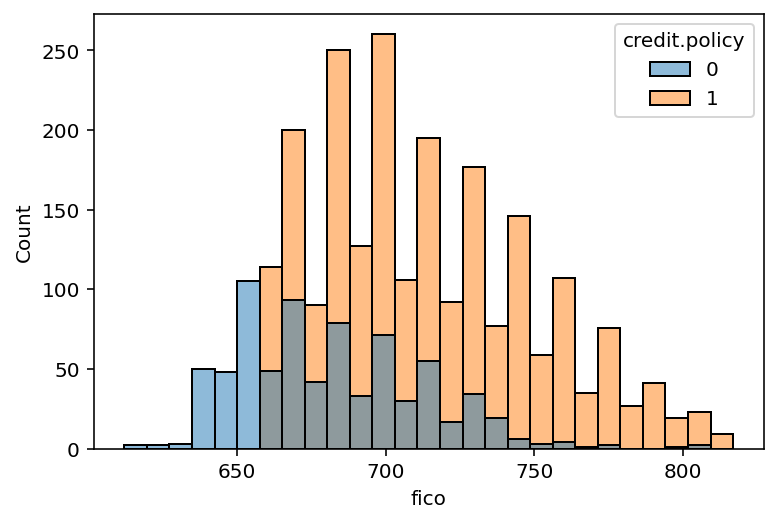

In [13]:
sns.histplot(data=loans, x="fico", hue="credit.policy")

**Create another histogram for `not.fully.paid` column.**

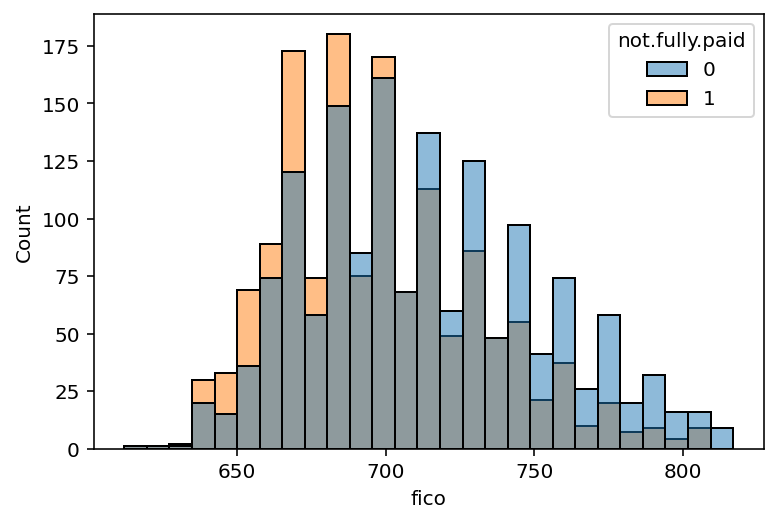

In [14]:
sns.histplot(data=loans, x="fico", hue="not.fully.paid")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

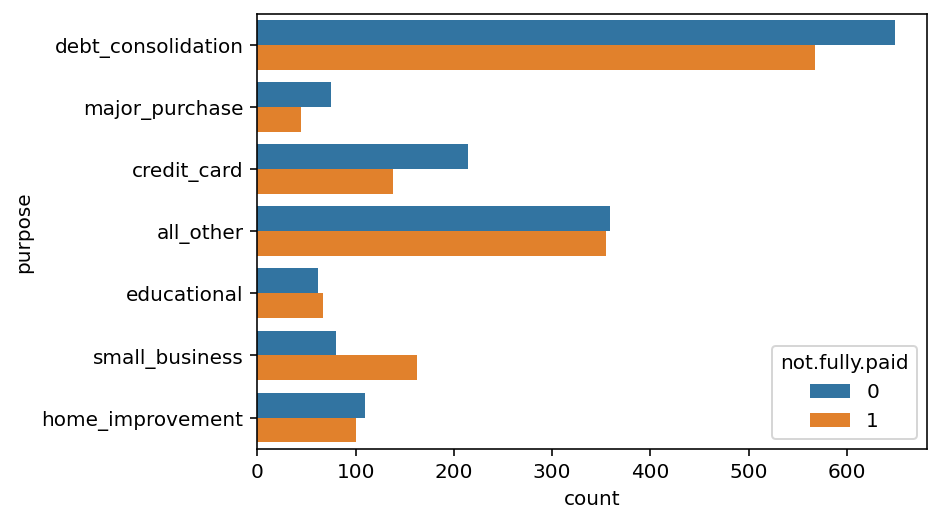

In [15]:
sns.countplot(data=loans, y="purpose", hue="not.fully.paid")

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

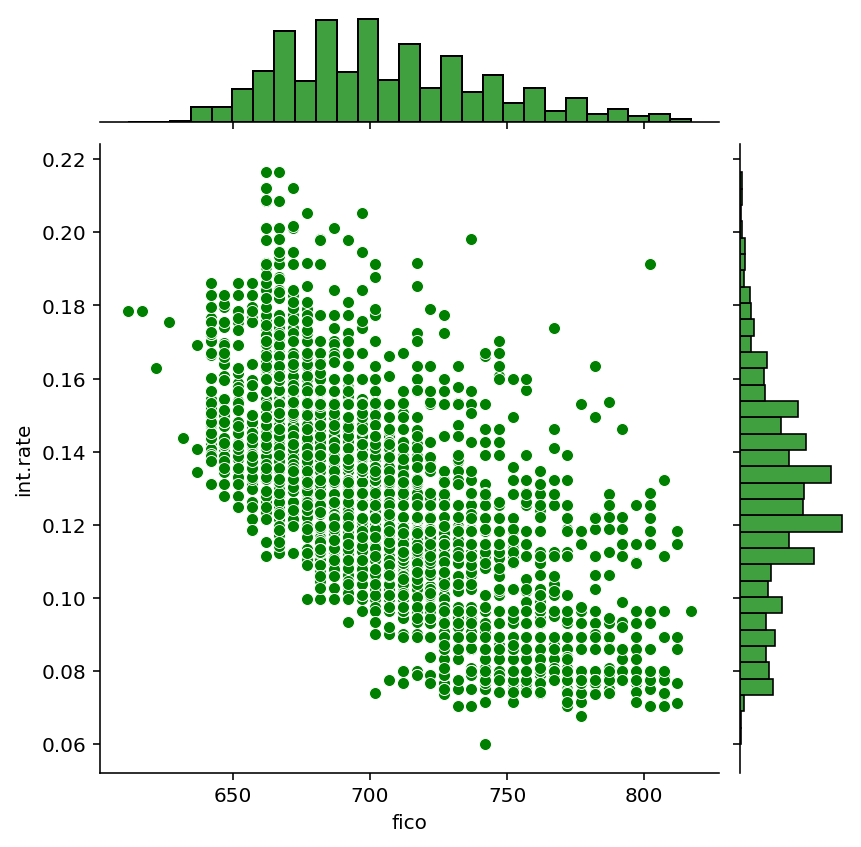

In [16]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='green')

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

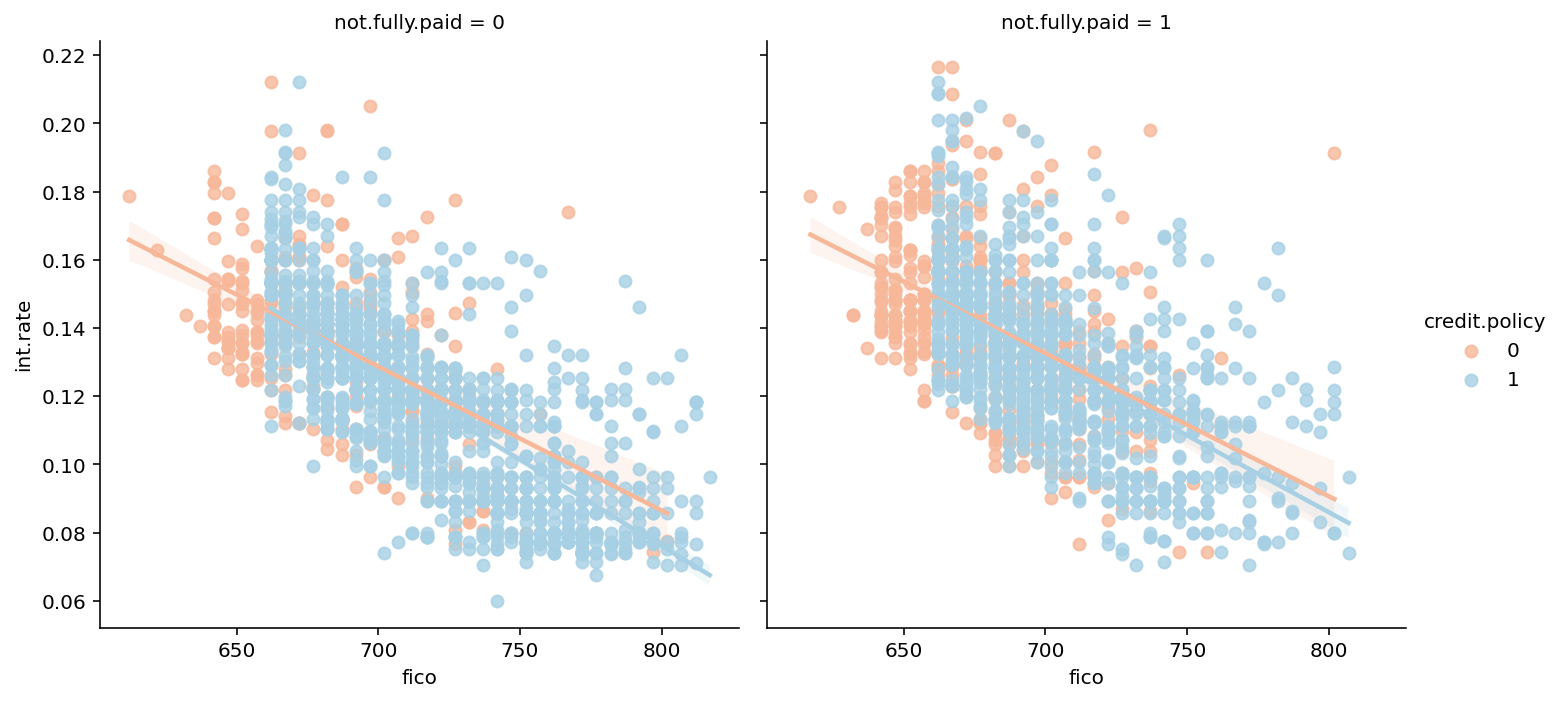

In [17]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='RdBu')

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [18]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [19]:
cat_feats = ['purpose']

In [20]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [21]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [22]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [25]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

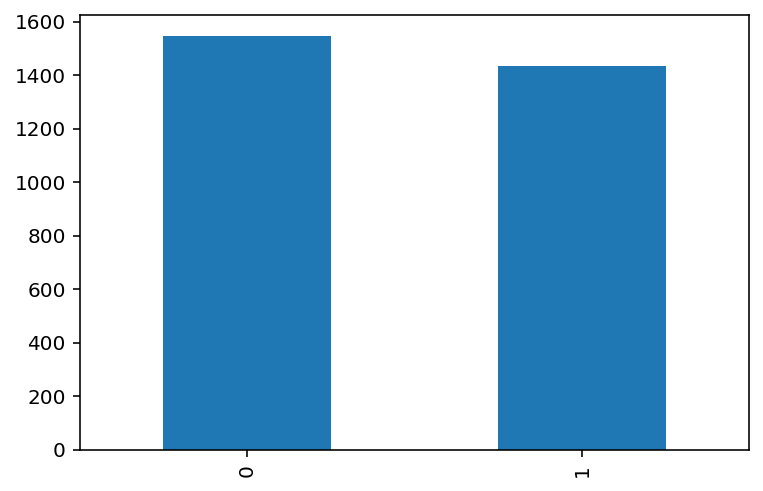

In [26]:
y.value_counts().plot(kind='bar')

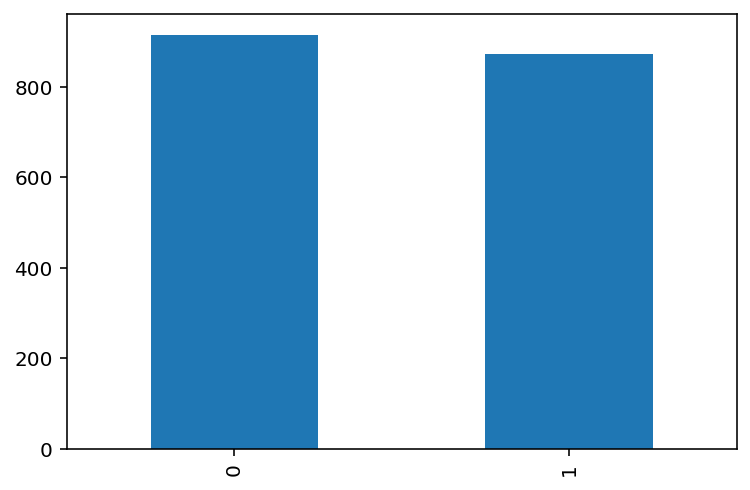

In [27]:
y_train.value_counts().plot(kind='bar')

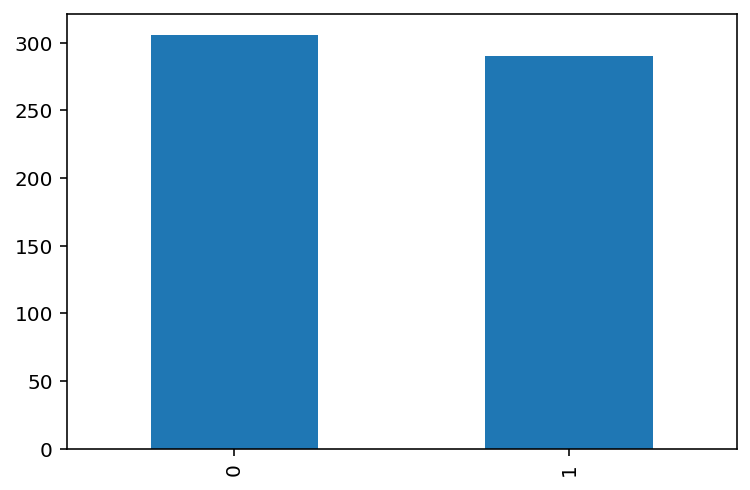

In [28]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtc = DecisionTreeClassifier()

fitting the model

In [31]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

storing predictions

In [32]:
predictions = dtc.predict(X_val)

calculating accuracy scores

In [33]:
train_score = dtc.score(X_train,y_train)
val_score = dtc.score(X_val,y_val)
print(train_score)
print(val_score)

1.0
0.5587248322147651


training accuracy is 1, while validation accuracy is .56

building confusion matrix

In [34]:
cm = metrics.confusion_matrix(y_val, predictions)
print(cm)

[[167 139]
 [124 166]]


performance metrics for validation set

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5587248322147651
Specificity = 0.545751633986928
Precision = 0.5590727282969974
Balanced Accuracy = 0.5590827135451881
F1 Score = 0.5587434663589221


hyper-parameter tuning, several values for the min_samples_split

In [36]:
dtc3 = DecisionTreeClassifier(min_samples_split=3)
dtc3.fit(X_train, y_train)
predictions = dtc3.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5520827918674023


In [37]:
dtc5 = DecisionTreeClassifier(min_samples_split=5)
dtc5.fit(X_train, y_train)
predictions = dtc5.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5638370019771097


In [38]:
dtc15 = DecisionTreeClassifier(min_samples_split=15)
dtc15.fit(X_train, y_train)
predictions = dtc15.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5805369127516778


In [39]:
dtc150 = DecisionTreeClassifier(min_samples_split=150)
dtc150.fit(X_train, y_train)
predictions = dtc150.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5923542007830969


apply cross-validation for min_samples_split

In [40]:
from sklearn.model_selection import GridSearchCV
grid = { 
    'min_samples_split': [2,3,5,15,50,150,250,500,1000],
    }
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=grid)
clf.fit(X_train, y_train)
clf.best_params_

{'min_samples_split': 150}

using the best value for min_samples_split (150) obtaining performance metrics for validation set

In [41]:
dtc150 = DecisionTreeClassifier(min_samples_split=150)
dtc150.fit(X_train, y_train)
predictions = dtc150.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5922818791946308
Specificity = 0.5882352941176471
Precision = 0.5923279618931793
Balanced Accuracy = 0.592393509127789
F1 Score = 0.5923542007830969


several values for max_depth

In [42]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5694300744307316


In [43]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5770858755338621


In [44]:
dtc = DecisionTreeClassifier(max_depth=25)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5586540208721853


In [45]:
dtc = DecisionTreeClassifier(max_depth=100)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
f1 = f1_score(y_val, predictions, average='weighted')
print("F1 Score =", f1)

F1 Score = 0.5670702218703386


cross validation for max_depth

In [46]:
grid = { 
    'max_depth': [1,2,3,5,10,15,50,150,250,500],
    }
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=grid)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 3}

using the best value for max_depth (3) obtaining performance metrics for validation set

In [47]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5973154362416108
Specificity = 0.8169934640522876
Precision = 0.6151789270068839
Balanced Accuracy = 0.591255352715799
F1 Score = 0.5751249259593977


grid search for min_samples_split and max_depth

In [48]:
grid = {
    'min_samples_split': [2,3,5,15,50,150,250,500,1000], 
    'max_depth': [1,2,3,5,10,15,50,150,250,500],
    }
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=grid)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 15, 'min_samples_split': 150}

performance metrics for best model according to grid search (max_depth = 15, min_samples_split = 150)

In [49]:
dtc = DecisionTreeClassifier(min_samples_split=150,max_depth=15)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5922818791946308
Specificity = 0.5882352941176471
Precision = 0.5923279618931793
Balanced Accuracy = 0.592393509127789
F1 Score = 0.5923542007830969


chart with feature importances

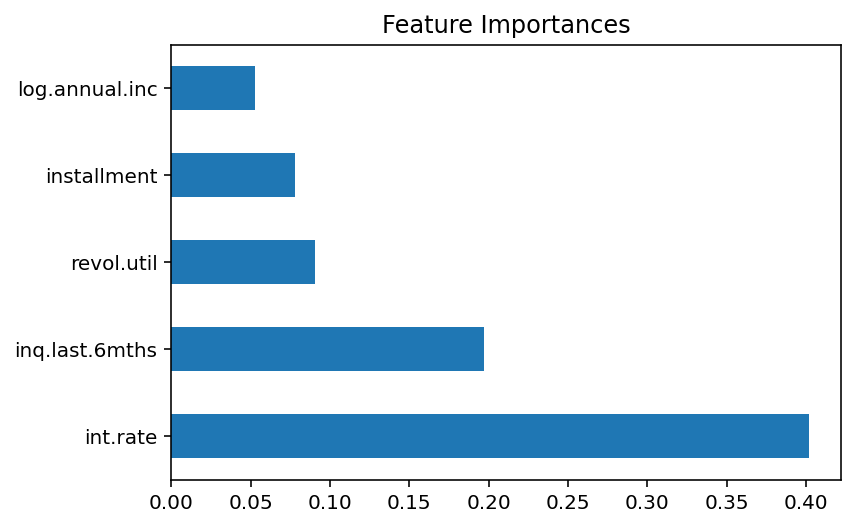

In [50]:
feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_val)
train_score = rfc.score(X_train,y_train)
val_score = rfc.score(X_val,y_val)
print(train_score)
print(val_score)

1.0
0.6124161073825504


In [52]:
cm = metrics.confusion_matrix(y_val, predictions)
print(cm)

[[193 113]
 [118 172]]


In [53]:
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.6124161073825504
Specificity = 0.630718954248366
Precision = 0.6120437750324363
Balanced Accuracy = 0.611911201262114
F1 Score = 0.6123013971895412


In [54]:
grid = {
    'min_samples_split': [2,50,150,250,500], 
    'max_depth': [None,1,5,15,50,250],
    'n_estimators': [1,10,50,100,250,500],
    }
gs = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=grid)
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': None, 'min_samples_split': 50, 'n_estimators': 250}

performance metrics for best model

In [56]:
rfc = RandomForestClassifier(max_depth=None, min_samples_split=50, n_estimators=250)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.610738255033557
Specificity = 0.6078431372549019
Precision = 0.610738255033557
Balanced Accuracy = 0.6108181203515889
F1 Score = 0.6108084017641903


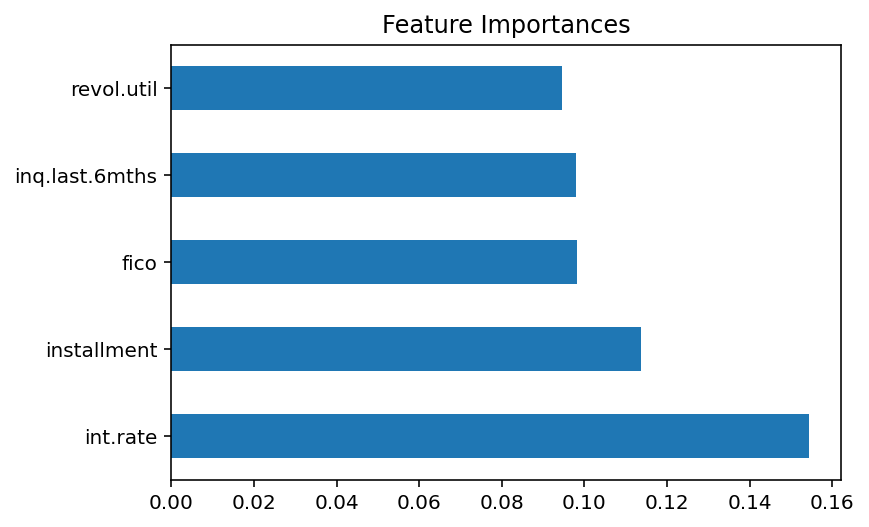

In [57]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.show()

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
predictions = adb.predict(X_val)
train_score = adb.score(X_train,y_train)
val_score = adb.score(X_val,y_val)
print(train_score)
print(val_score)

0.6739373601789709
0.5855704697986577


In [60]:
cm = metrics.confusion_matrix(y_val, predictions)
print(cm)

[[177 129]
 [118 172]]


In [61]:
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5855704697986577
Specificity = 0.5784313725490197
Precision = 0.5857142857142856
Balanced Accuracy = 0.5857674104124408
F1 Score = 0.5856346426638516


In [63]:
grid = {
    'learning_rate': [0,0.1,0.5,1,2,5,100], 
    'n_estimators': [1,10,50,100,250,500],
    }
gs = GridSearchCV(estimator=AdaBoostClassifier(),
                   param_grid=grid)
gs.fit(X_train, y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [64]:
adb = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
adb.fit(X_train, y_train)
predictions = adb.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.5973154362416108
Specificity = 0.6209150326797386
Precision = 0.5968740118353887
Balanced Accuracy = 0.5966644128915934
F1 Score = 0.5970974251987458


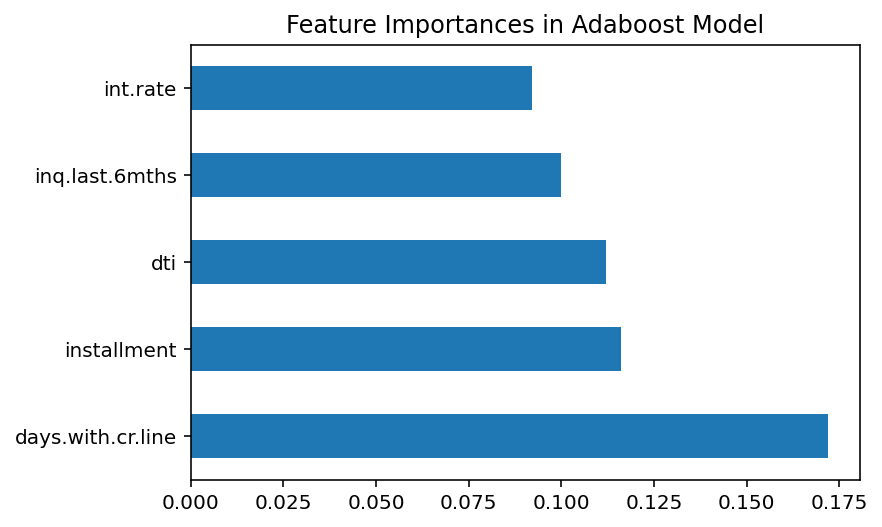

In [75]:
feat_importances = pd.Series(adb.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances in Adaboost Model')
plt.show()

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_val)
train_score = gbc.score(X_train,y_train)
val_score = gbc.score(X_val,y_val)
print(train_score)
print(val_score)

0.7986577181208053
0.610738255033557


In [69]:
cm = metrics.confusion_matrix(y_val, predictions)
print(cm)

[[193 113]
 [119 171]]


In [70]:
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.610738255033557
Specificity = 0.630718954248366
Precision = 0.6103512098230408
Balanced Accuracy = 0.6101870633310795
F1 Score = 0.6105934061044062


In [71]:
grid = {
    'learning_rate': [0,0.1,0.5,1,2,5,100], 
    'n_estimators': [1,10,50,100,250,500],
    }
gs = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=grid)
gs.fit(X_train, y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [72]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
spec = recall_score(y_val, predictions, pos_label = 0)
pres = precision_score(y_val, predictions, average='macro')
bal = balanced_accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

Recall = 0.610738255033557
Specificity = 0.6241830065359477
Precision = 0.6104121572871573
Balanced Accuracy = 0.6103673653369394
F1 Score = 0.6106987685903044


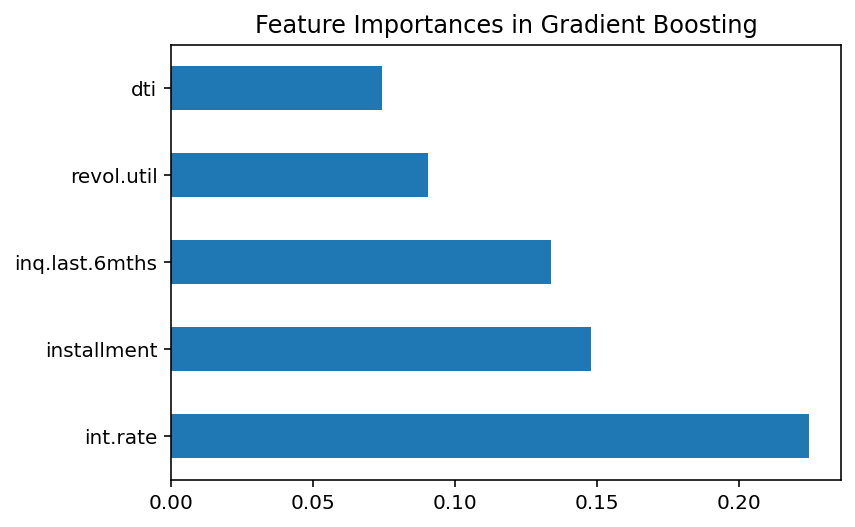

In [74]:
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.title('Feature Importances in Gradient Boosting')
plt.show()

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

In the random forest classifier changing the default criterion from 'gini' to 'entropy' could improve recall and F1, implemented below with optimized model values:

In [80]:
rfc = RandomForestClassifier(max_depth=None, criterion='entropy', min_samples_split=50, n_estimators=250)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("F1 Score =", f1)

Recall = 0.6140939597315436
F1 Score = 0.6141461091964447


resulted in slight increase in F1 score from 0.610 to 0.614

for gradient boost classifier changing the loss function from default deviance to exponential could improve recall and F1, implemented below with optimized model values:

In [87]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, loss='exponential')
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_val)
recall = recall_score(y_val, predictions, average='micro')
f1 = f1_score(y_val, predictions, average='weighted')
print("Recall =", recall)
print("F1 Score =", f1)

Recall = 0.6057046979865772
F1 Score = 0.6056413627307269


resulted in slight decrease in F1 score from .61 to .60

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [94]:
print('decision tree best model:')
dtc = DecisionTreeClassifier(min_samples_split=150,max_depth=15)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
recall = recall_score(y_test, predictions, average='micro')
spec = recall_score(y_test, predictions, pos_label = 0)
pres = precision_score(y_test, predictions, average='macro')
bal = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

print('\n', 'random forest best model:')
rfc = RandomForestClassifier(max_depth=None, min_samples_split=50, n_estimators=250)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
recall = recall_score(y_test, predictions, average='micro')
spec = recall_score(y_test, predictions, pos_label = 0)
pres = precision_score(y_test, predictions, average='macro')
bal = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

print('\n', 'adaboost best model:')
adb = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
adb.fit(X_train, y_train)
predictions = adb.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
recall = recall_score(y_test, predictions, average='micro')
spec = recall_score(y_test, predictions, pos_label = 0)
pres = precision_score(y_test, predictions, average='macro')
bal = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

print('\n', 'gradient boosting best model:')
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
recall = recall_score(y_test, predictions, average='micro')
spec = recall_score(y_test, predictions, pos_label = 0)
pres = precision_score(y_test, predictions, average='macro')
bal = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print("Recall =", recall)
print("Specificity =", spec)
print("Precision =", pres)
print("Balanced Accuracy =", bal)
print("F1 Score =", f1)

decision tree best model:
[[205 122]
 [122 148]]
Recall = 0.5912897822445561
Specificity = 0.6269113149847095
Precision = 0.5875297315664288
Balanced Accuracy = 0.5875297315664288
F1 Score = 0.5912897822445561

 random forest best model:
[[197 130]
 [111 159]]
Recall = 0.5963149078726968
Specificity = 0.6024464831804281
Precision = 0.5948916999955063
Balanced Accuracy = 0.5956676860346586
F1 Score = 0.5971360047034151

 adaboost best model:
[[206 121]
 [119 151]]
Recall = 0.5979899497487438
Specificity = 0.6299694189602446
Precision = 0.5944966063348416
Balanced Accuracy = 0.5946143391097519
F1 Score = 0.5981150858769431

 gradient boosting best model:
[[210 117]
 [117 153]]
Recall = 0.6080402010050251
Specificity = 0.6422018348623854
Precision = 0.604434250764526
Balanced Accuracy = 0.604434250764526
F1 Score = 0.6080402010050251


Winner among all appears to be Gradient Boosting!

# Great Job!